In [21]:
!pip install -r requirements.txt

In [2]:
 pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/29/a2/d40fb2460e883eca5199c62cfc2463fd261f760556ae6290f88488c362c0/pip-25.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 653.6 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/1.8 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/375.9 MB 8.4 MB/s eta 0:00:45
   ---------------------------------------- 4.2/375.9 MB 10.1 MB/s eta 0:00:37
    --------------------------------------- 6.3/375.9 MB 9.9 MB/s eta 0:00:38
    --------------------------------------- 8.4/375.9 MB 10.0 MB/s eta 0:00:37
   - -------------------------------------- 10.7/375.9 MB 9.9 MB/s eta 0:00:38
   - --------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

In [ ]:
caminho = r"G:\.shortcut-targets-by-id\1oE-zIqZbRz2ez0t_V-LtSwaX3WOtwg9E\TCC - Aline e Gabi\sinais_treinados"

import os

# Testa se a pasta existe
if os.path.exists(caminho):
    print("✅ O caminho existe!")
    # Lista os arquivos/pastas dentro dela
    print("Conteúdo da pasta:", os.listdir(caminho))
else:
    print("❌ O caminho NÃO existe ou não está acessível.")

✅ O caminho existe!
Conteúdo da pasta: ['oi', 'obrigado', 'bom_dia', 'comi_muito', 'de_nada', 'tudo_bem', 'boa_noite', 'voce_gosta_de_cafe', 'feliz_em_encontrar_voce', 'eu_amo_você', 'espero_que_esteja_tudo bem', 'desejo_um_otimo_dia', 'boa_tarde', 'bater_papo', 'desculpa', 'ontem_estava_doente', 'prazer_conhecer_voce', 'ontem_trabalhei_muito', 'desktop.ini']


In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Treinando em:", device)

Treinando em: cuda


In [2]:
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 3060


In [ ]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms

# ------ Configurações ------
model_path = 'cnn_lstm_model.pth'
dataset_path = 'D:\Everaldo\Pictures\tcc'
max_len = 135
frame_size = (224, 224)

# ------ Modelo CNN + LSTM ------
class CNNLSTMModel(nn.Module):
    def __init__(self, cnn_output_size, hidden_size, num_classes):
        super(CNNLSTMModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.lstm = nn.LSTM(input_size=cnn_output_size, hidden_size=128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        batch_size, seq_len, C, H, W = x.size()
        c_out = []
        for i in range(seq_len):
            cnn_out = self.cnn(x[:, i])
            cnn_out = cnn_out.view(batch_size, -1)
            c_out.append(cnn_out)
        cnn_out_seq = torch.stack(c_out, dim=1)
        lstm_out, _ = self.lstm(cnn_out_seq)
        out = self.fc(lstm_out[:, -1])
        return out

# ------ Obter mapeamento de classes ------
def get_class_map(dataset_path):
    gestures = sorted(os.listdir(dataset_path))
    return {idx: gesture for idx, gesture in enumerate(gestures)}

# ------ Carrega modelo ------
class_map = get_class_map(dataset_path)
num_classes = len(class_map)
model = CNNLSTMModel(cnn_output_size=32 * 56 * 56, hidden_size=128, num_classes=num_classes)
model.load_state_dict(torch.load(model_path))
model.eval()

# ------ Transformação para imagens ------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(frame_size)
])

<>:9: SyntaxWarning: invalid escape sequence '\E'
<>:9: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Everaldo\AppData\Local\Temp\ipykernel_8808\772789694.py:9: SyntaxWarning: invalid escape sequence '\E'
  dataset_path = 'D:\Everaldo\Pictures\tcc'
C:\Users\Everaldo\AppData\Local\Temp\ipykernel_8808\772789694.py:9: SyntaxWarning: invalid escape sequence '\E'
  dataset_path = 'D:\Everaldo\Pictures\tcc'


OSError: [WinError 123] A sintaxe do nome do arquivo, do nome do diretório ou do rótulo do volume está incorreta: 'D:\\Everaldo\\Pictures\tcc'

In [ ]:
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import cv2

class GestureDataset(Dataset):
    def __init__(self, base_path, max_len=30, use_raw=True, use_aug=True):
        self.sequences = []
        self.labels = []
        self.class_to_idx = {}

        gestures = sorted(os.listdir(base_path))
        for idx, gesture in enumerate(gestures):
            gesture_path = os.path.join(base_path, gesture)
            if not os.path.isdir(gesture_path):
                continue
            self.class_to_idx[gesture] = idx
            for seq_folder in os.listdir(gesture_path):
                seq_path = os.path.join(gesture_path, seq_folder)
                if not os.path.isdir(seq_path):
                    continue

                if use_raw:
                    frames_path = os.path.join(seq_path, 'raw')
                    if os.path.isdir(frames_path):
                        frames = sorted([
                            os.path.join(frames_path, f) for f in os.listdir(frames_path)
                            if f.endswith(('.jpg', '.png'))
                        ])
                        if len(frames) > 0:
                            self.sequences.append(frames)
                            self.labels.append(idx)

                if use_aug:
                    frames_path = os.path.join(seq_path, 'aug')
                    if os.path.isdir(frames_path):
                        frames = sorted([
                            os.path.join(frames_path, f) for f in os.listdir(frames_path)
                            if f.endswith(('.jpg', '.png'))
                        ])
                        if len(frames) > 0:
                            self.sequences.append(frames)
                            self.labels.append(idx)

        self.max_len = max_len
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224, 224)),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        frames = self.sequences[idx]
        label = self.labels[idx]
        tensor_seq = []

        for fpath in frames[:self.max_len]:
            img = cv2.imread(fpath)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            tensor = self.transform(img)
            tensor_seq.append(tensor)

        while len(tensor_seq) < self.max_len:
            tensor_seq.append(torch.zeros_like(tensor_seq[0]))

        tensor_seq = torch.stack(tensor_seq)
        return tensor_seq, torch.tensor(label)

# ------------------- TREINAMENTO -------------------

# base_path = r'G:\.shortcut-targets-by-id\1oE-zIqZbRz2ez0t_V-LtSwaX3WOtwg9E\TCC - Aline e Gabi\gestures_dataset'
base_path = r'D:\Everaldo\Pictures\temp_gestures_dataset'
dataset = GestureDataset(base_path, max_len=60, use_raw=True, use_aug=False)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

cnn_output_size = 32 * 56 * 56
hidden_size = 128
num_classes = len(dataset.class_to_idx)

model = CNNLSTMModel(cnn_output_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'D:\\Everaldo\\Pictures\\temp_gestures_dataset'

In [6]:
from collections import Counter
print(Counter(dataset.labels))

NameError: name 'dataset' is not defined

In [7]:
for sequences, labels in dataloader:
        sequences = sequences.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(sequences)
        print(outputs)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

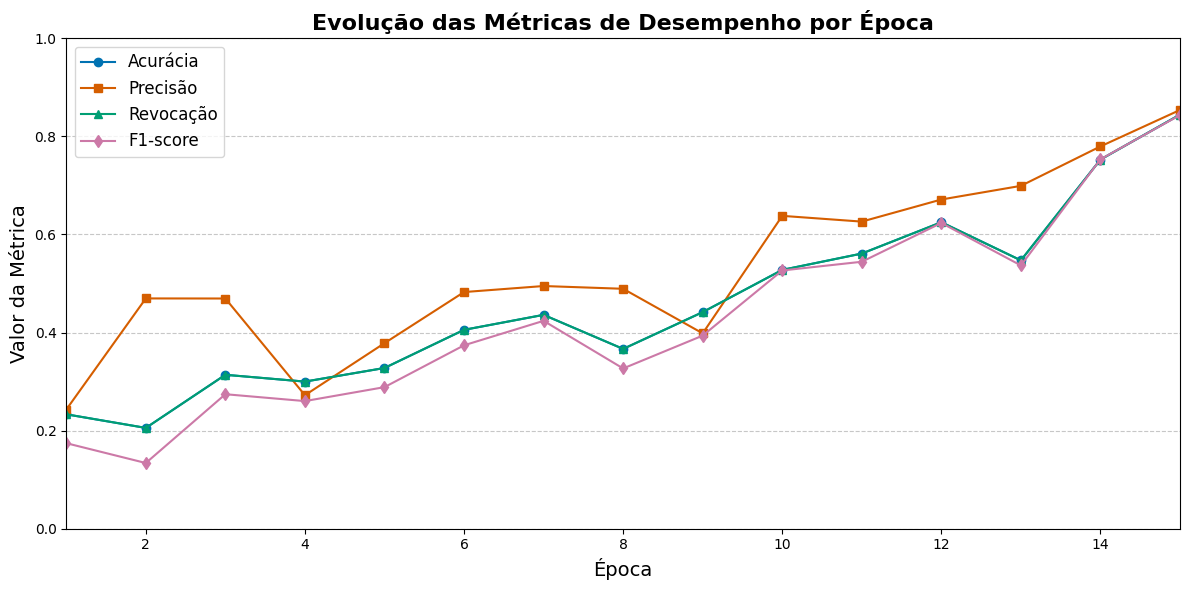

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos dados
df = pd.read_csv("metrics_history.csv")

plt.figure(figsize=(12, 6))

# Paleta de cores acadêmica
colors = {
    "Accuracy": "#0072B2",  # Azul
    "Precision": "#D55E00", # Laranja
    "Recall": "#009E73",    # Verde
    "F1-score": "#CC79A7"   # Rosa
}

plt.plot(df["epoch"], df["accuracy"], marker='o', label="Acurácia", color=colors["Accuracy"])
plt.plot(df["epoch"], df["precision"], marker='s', label="Precisão", color=colors["Precision"])
plt.plot(df["epoch"], df["recall"], marker='^', label="Revocação", color=colors["Recall"])
plt.plot(df["epoch"], df["f1"], marker='d', label="F1-score", color=colors["F1-score"])

plt.xlabel("Época", fontsize=14)
plt.ylabel("Valor da Métrica", fontsize=14)
plt.title("Evolução das Métricas de Desempenho por Época", fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.xlim(df["epoch"].min(), df["epoch"].max())
plt.tight_layout()

# Se quiser salvar para inserir em relatório/artigo
# plt.savefig("metricas_evolucao.png", dpi=300, bbox_inches="tight")

plt.show()


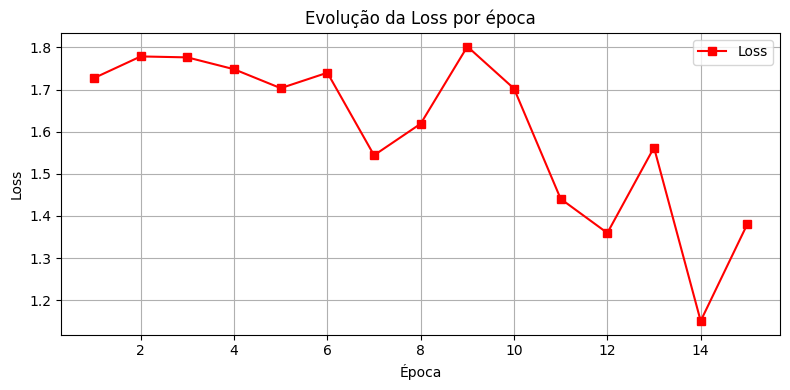

In [3]:
plt.figure(figsize=(8, 4))
plt.plot(df["epoch"], df["loss"], marker='s', color='red', label="Loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Loss por época")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

       num_frames
count  120.000000
mean    81.950000
std     28.669912
min     33.000000
25%     60.750000
50%     78.500000
75%    100.250000
max    174.000000


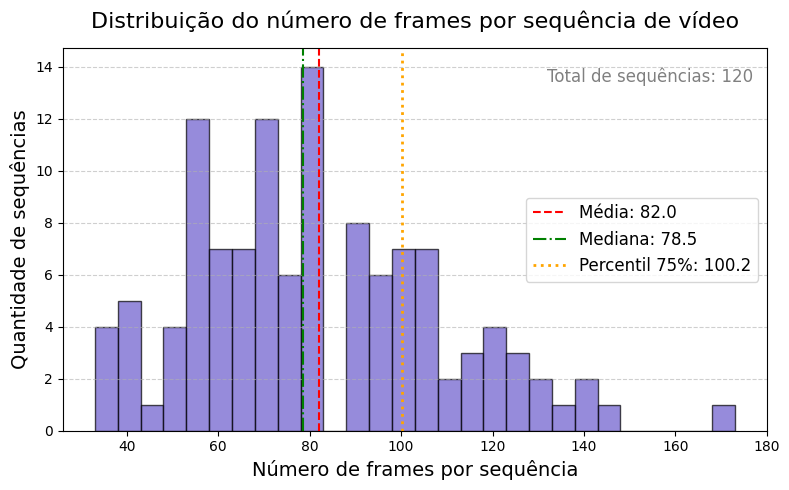

In [5]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

# Caminho das sequências processadas
base_path = r'D:\Everaldo\Documents\IFF\AlineGabi\imagens_tcc'

data = []
for gesture in sorted(os.listdir(base_path)):
    gesture_path = os.path.join(base_path, gesture)
    if not os.path.isdir(gesture_path):
        continue
    for sequence in sorted(os.listdir(gesture_path)):
        seq_path = os.path.join(gesture_path, sequence, "raw")
        if not os.path.isdir(seq_path):
            continue
        # Conta os arquivos de frame na subpasta 'raw'
        frame_files = [f for f in os.listdir(seq_path) if f.endswith('.jpg') or f.endswith('.png')]
        data.append({
            "gesture": gesture,
            "sequence": sequence,
            "num_frames": len(frame_files)
        })

# Converte para DataFrame
df = pd.DataFrame(data)
df.to_csv("distribuicao_frames.csv", index=False)
print(df.describe())

# Supondo que df['num_frames'] já foi definido como no script anterior
num_frames = df["num_frames"]

plt.figure(figsize=(8, 5))
bins = np.arange(num_frames.min(), num_frames.max() + 2, 5)  # Intervalos de 5 frames

# Plot histograma
plt.hist(num_frames, bins=bins, color='slateblue', edgecolor='black', alpha=0.7)

# Linhas da média e mediana
mean = num_frames.mean()
median = num_frames.median()
plt.axvline(mean, color='red', linestyle='--', label=f'Média: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-.', label=f'Mediana: {median:.1f}')

# Linha do percentil 75%
p75 = num_frames.quantile(0.75)
plt.axvline(p75, color='orange', linestyle=':', linewidth=2, label=f'Percentil 75%: {p75:.1f}')

# Títulos e labels com fonte maior
plt.title("Distribuição do número de frames por sequência de vídeo", fontsize=16, pad=15)
plt.xlabel("Número de frames por sequência", fontsize=14)
plt.ylabel("Quantidade de sequências", fontsize=14)

# Grade discreta
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Legenda
plt.legend(fontsize=12)

# Notas no gráfico
plt.annotate(f'Total de sequências: {len(num_frames)}', 
             xy=(0.98, 0.95), xycoords='axes fraction', 
             ha='right', va='top', fontsize=12, color='gray')

plt.tight_layout()
plt.savefig("distribuicao_frames_hist.png", dpi=300, bbox_inches='tight')
plt.show()

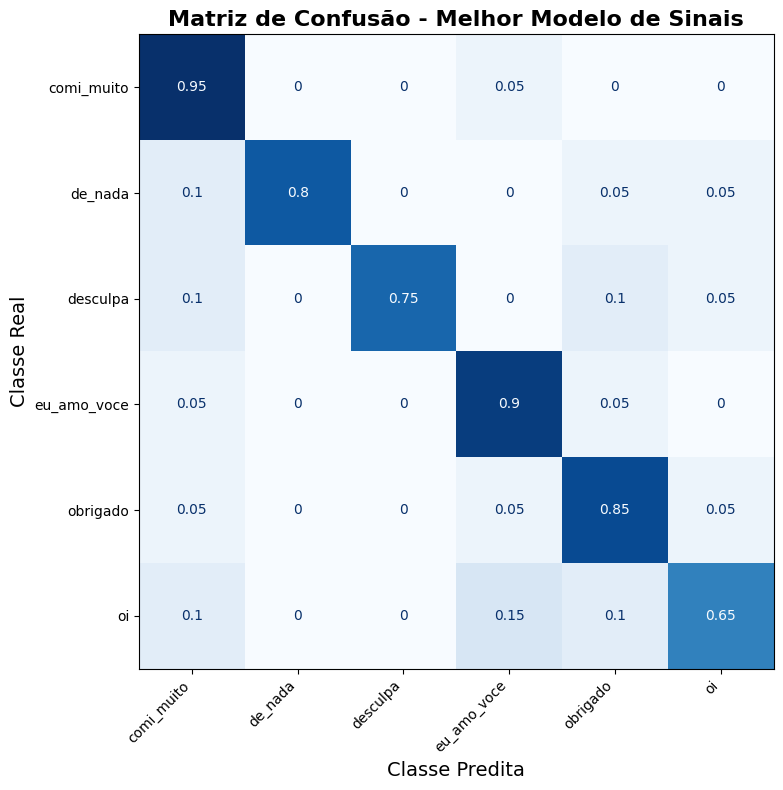

In [13]:
import torch
import os
import numpy as np
import cv2
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --------- Definições do Dataset (ajuste conforme seu projeto) ---------

def sample_frames(frames, num_samples):
    if len(frames) <= num_samples:
        return frames + [frames[-1]] * (num_samples - len(frames))
    idxs = np.linspace(0, len(frames) - 1, num_samples).astype(int)
    return [frames[i] for i in idxs]

class GestureDataset(Dataset):
    def __init__(self, base_path, max_len=135, use_raw=True, use_aug=True):
        self.sequences = []
        self.labels = []
        self.class_to_idx = {}

        gestures = sorted(os.listdir(base_path))
        for idx, gesture in enumerate(gestures):
            gesture_path = os.path.join(base_path, gesture)
            if not os.path.isdir(gesture_path):
                continue
            self.class_to_idx[gesture] = idx
            for seq_folder in os.listdir(gesture_path):
                seq_path = os.path.join(gesture_path, seq_folder)
                if not os.path.isdir(seq_path):
                    continue

                if use_raw:
                    frames_path = os.path.join(seq_path, 'raw')
                    if os.path.isdir(frames_path):
                        frames = sorted([
                            os.path.join(frames_path, f) for f in os.listdir(frames_path)
                            if f.endswith(('.jpg', '.png'))
                        ])
                        if len(frames) > 0:
                            self.sequences.append(frames)
                            self.labels.append(idx)

                if use_aug:
                    frames_path = os.path.join(seq_path, 'aug')
                    if os.path.isdir(frames_path):
                        frames = sorted([
                            os.path.join(frames_path, f) for f in os.listdir(frames_path)
                            if f.endswith(('.jpg', '.png'))
                        ])
                        if len(frames) > 0:
                            self.sequences.append(frames)
                            self.labels.append(idx)

        self.max_len = max_len
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224, 224)),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        frames = self.sequences[idx]
        label = self.labels[idx]
        selected_frames = sample_frames(frames, self.max_len)
        tensor_seq = []
        for fpath in selected_frames:
            img = cv2.imread(fpath)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            tensor = self.transform(img)
            tensor_seq.append(tensor)
        tensor_seq = torch.stack(tensor_seq)
        return tensor_seq, torch.tensor(label)

# --------- Definição do Modelo (igual ao usado no treino) ---------

import torch.nn as nn

class CNNLSTMModel(nn.Module):
    def __init__(self, cnn_output_size, hidden_size, num_classes):
        super(CNNLSTMModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.lstm = nn.LSTM(input_size=cnn_output_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        batch_size, seq_len, C, H, W = x.size()
        c_out = []
        for i in range(seq_len):
            cnn_out = self.cnn(x[:, i])
            cnn_out = cnn_out.view(batch_size, -1)
            c_out.append(cnn_out)
        cnn_out_seq = torch.stack(c_out, dim=1)
        lstm_out, _ = self.lstm(cnn_out_seq)
        out = self.fc(lstm_out[:, -1])
        return out

# --------- Configuração ---------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ajuste os caminhos abaixo:
base_path = r'D:\Everaldo\Documents\IFF\AlineGabi\imagens_tcc'
model_path = 'cnn_lstm_best_model.pth'
max_len = 100
cnn_output_size = 32 * 56 * 56
hidden_size = 128

# Dataset e dataloader
dataset = GestureDataset(base_path, max_len=max_len, use_raw=True, use_aug=True)
dataloader = DataLoader(dataset, batch_size=4, shuffle=False)

num_classes = len(dataset.class_to_idx)
model = CNNLSTMModel(cnn_output_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load(model_path, weights_only=False))
model.eval()

# --------- Avaliação e Matriz de Confusão ---------

all_labels = []
all_preds = []
with torch.no_grad():
    for sequences, labels in dataloader:
        sequences = sequences.to(device)
        labels = labels.to(device)
        outputs = model(sequences)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_preds, normalize='true')
display_labels = [k for k, v in sorted(dataset.class_to_idx.items(), key=lambda item: item[1])]

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(ax=ax, cmap="Blues", xticks_rotation='vertical', colorbar=False)
plt.title("Matriz de Confusão - Melhor Modelo de Sinais", fontsize=16, fontweight='bold')
plt.xlabel("Classe Predita", fontsize=14)
plt.ylabel("Classe Real", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("matriz_confusao_melhor_modelo.png", dpi=300)
plt.show()

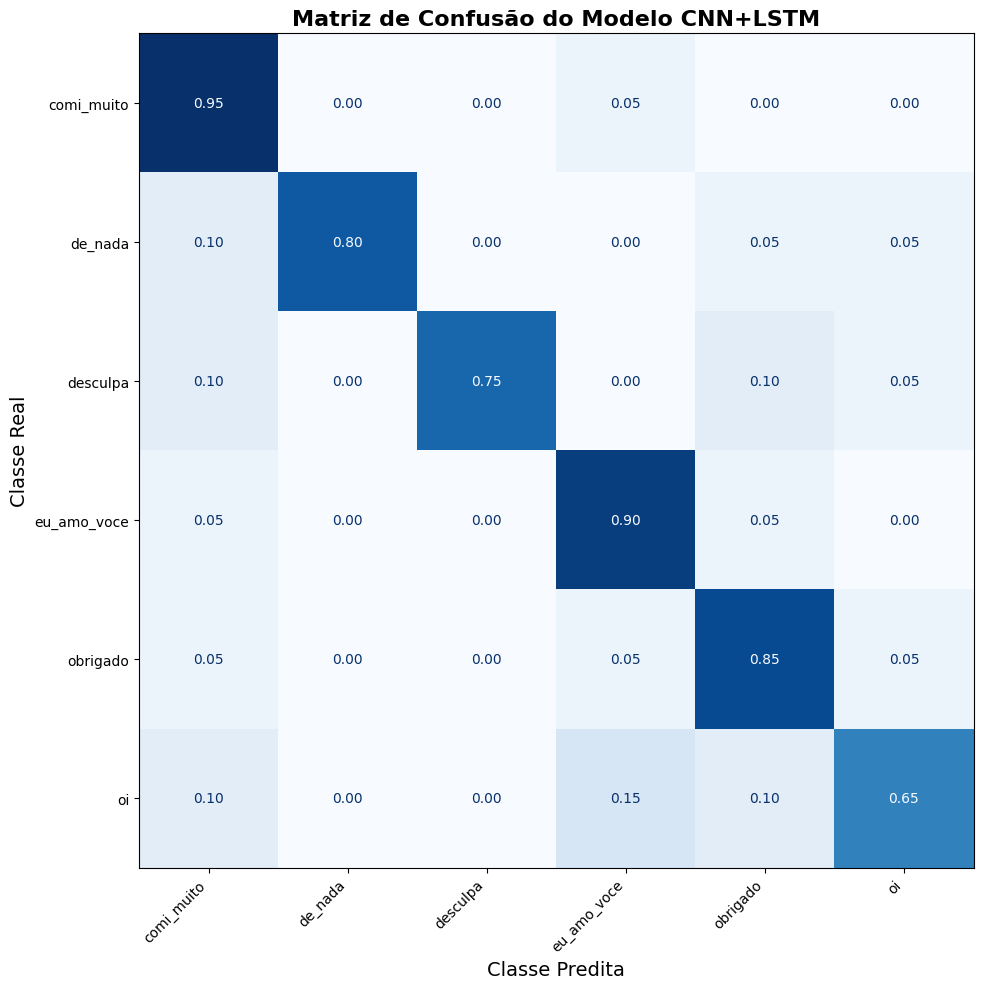

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supondo que você tem listas/arrays com os rótulos verdadeiros e predições
# Exemplo:
# all_labels = [...]
# all_preds = [...]

# Se já tem o DataFrame salvo, pode carregar assim:
# df = pd.read_csv("metrics_history.csv")
# all_labels = df["label_real"]
# all_preds = df["label_predito"]

# Se não tiver, substitua as listas acima pelos seus resultados.

# Nomes das classes para o eixo (ordem igual à do seu class_to_idx)
class_names = [
    "comi_muito", "de_nada", "desculpa", "eu_amo_voce", "obrigado", "oi"
]

cm = confusion_matrix(all_labels, all_preds, normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(
    cmap=plt.cm.Blues,
    values_format='.2f',
    ax=ax,
    colorbar=False
)

plt.title("Matriz de Confusão do Modelo CNN+LSTM", fontsize=16, fontweight='bold')
plt.xlabel("Classe Predita", fontsize=14)
plt.ylabel("Classe Real", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Para salvar em alta resolução (opcional)
# plt.savefig("matriz_confusao_cnn_lstm.png", dpi=300, bbox_inches="tight")

plt.show()
